# Trading
## Report - 1 day


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener todas las importaciones necesarias para tus funciones personalizadas
from technical_analysis.indicators import calculate_rsi, calculate_sma, calculate_bollinger, calculate_volume_oscillator
from technical_analysis.get_strategies import get_strategies
from technical_analysis.backtest import backtest
from technical_analysis.generate_buy_signals import generate_buy_signals
from technical_analysis.generate_sell_signals import generate_sell_signals
from technical_analysis.set_params import set_params
from technical_analysis.optimize import optimize


[{'id': 1, 'indicators': ['SMA'], 'params': {}}, {'id': 2, 'indicators': ['RSI'], 'params': {}}, {'id': 3, 'indicators': ['SMA', 'RSI'], 'params': {}}, {'id': 4, 'indicators': ['Bollinger Bands'], 'params': {}}, {'id': 5, 'indicators': ['SMA', 'Bollinger Bands'], 'params': {}}]


In [2]:
# Cargar conjunto de datos
data_1d = pd.read_csv("data/aapl_1d_train.csv")


In [3]:
# Calcula los indicadores para el conjunto de datos
data_1d['RSI'] = calculate_rsi(data_1d, window=14)
data_1d['SMA'] = calculate_sma(data_1d['Close'], window=50)
data_1d['BB_mavg'], data_1d['BB_hband'], data_1d['BB_lband'] = calculate_bollinger(data_1d, 20, 2)
data_1d['Volume_Osc'] = calculate_volume_oscillator(data_1d, 5, 20)
data_1d.tail()

Date    Open    High     Low   Close  Adjusted_close     Volume  \
5279  2020-12-24  131.32  133.46  131.10  131.97        129.6797   54930100   
5280  2020-12-28  133.99  137.34  133.51  136.69        134.3178  124486200   
5281  2020-12-29  138.05  138.79  134.34  134.87        132.5294  121047300   
5282  2020-12-30  135.58  135.99  133.40  133.72        131.3994   96452100   
5283  2020-12-31  134.08  134.74  131.72  132.69        130.3872   99116600   

            RSI       SMA   BB_mavg    BB_hband    BB_lband  Volume_Osc  
5279  65.362816  119.7370  124.9030  133.071582  116.734418  20310895.0  
5280  71.315720  120.0566  125.9080  134.663062  117.152938   2810090.0  
5281  66.565134  120.3736  126.6990  135.688184  117.709816   5187375.0  
5282  63.678664  120.7284  127.2490  136.538125  117.959875  -7739360.0  
5283  61.122180  121.0320  127.7295  137.100151  118.358849  -6066400.0

In [4]:
strategies = get_strategies()
# Genera señales de compra y venta para las estrategias
buy_signals = generate_buy_signals(data_1d, strategies)
sell_signals = generate_sell_signals(data_1d, strategies)


In [5]:
buy_signals.tail(50)

Signal_1  Signal_2  Signal_3  Signal_4  Signal_5  Signal_6  Signal_7  \
5234         1         0         0         0         0         0         0   
5235         1         0         0         0         0         0         0   
5236         0         0         0         0         0         0         0   
5237         0         0         0         0         0         0         0   
5238         0         0         0         0         0         0         0   
5239         0         1         0         0         0         0         0   
5240         0         0         0         0         0         0         0   
5241         0         0         0         1         0         0         0   
5242         0         0         0         0         0         0         0   
5243         0         0         0         0         0         0         0   
5244         0         0         0         0         0         0         0   
5245         0         0         0         0         0         0         0   
5246         0         0         0         0         0         0         0   
5247         0         0         0         0         0         0         0   
5248         1         0         0         0         0         0         0   
5249         1         0         0         0         0         0         0   
5250         1         0         0         0         0         0         0   
5251         1         0         0         0         0         0         0   
5252         1         0         0         0         0         0         0   
5253         1         0         0         0         0         0         0   
5254         1         0         0         0         0         0         0   
5255         1         0         0         0         0         0         0   
5256         1         0         0         0         0         0         0   
5257         1         0         0         0         0         0         0   
5258         1         0         0         0         0         0         0   
5259         1         0         0         0         0         0         0   
5260         0         0         0         0         0         0         0   
5261         0         0         0         0         0         0         0   
5262         1         0         0         0         0         0         0   
5263         1         0         0         0         0         0         0   
5264         1         0         0         0         0         0         0   
5265         1         0         0         0         0         0         0   
5266         1         0         0         0         0         0         0   
5267         1         0         0         0         0         0         0   
5268         1         0         0         0         0         0         0   
5269         1         0         0         0         0         0         0   
5270         1         0         0         0         0         0         0   
5271         1         0         0         0         0         0         0   
5272         1         0         0         0         0         0         0   
5273         1         0         0         0         0         0         0   
5274         1         0         0         0         0         0         0   
5275         1         0         0         0         0         0         0   
5276         1         0         0         0         0         0         0   
5277         1         0         0         0         0         0         0   
5278         1         0         0         0         0         0         0   
5279         1         0         0         0         0         0         0   
5280         1         0         0         0         0         0         0   
5281         1         0         0         0         0         0         0   
5282         1         0         0         0         0         0         0   
5283         1         0         0         0         0         0         0   

      Signal_8  Signal_9  S

In [6]:
# Realiza el backtesting para cada estrategia y guarda los resultados
backtest_results = backtest(data_1d, buy_signals, sell_signals, initial_cash=10000, commission_per_trade=0.001, shares_to_operate=10, stop_loss=0.01, take_profit=0.01)
backtest_results

{'initial_cash': 10000,
 'final_portfolio_value': 3166.45989200089,
 'total_return': -0.683354010799911,
 'portfolio_value_over_time': [10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  9998.995584,
  10031.860864000002,
  10056.049504000002,
  10123.107488000003,
  10099.041152000003,
  10046.292064000003,
  10103.967136000003,
  10081.155424000004,
  10079.251424000004,
  9994.571136000004,
  9994.571136000004,
  9993.568624000005,
  9977.256272000004,
  10020.102096000004,
  10062.710032000006,
  10239.923600000007,
  10244.653248000006,
  10148.973888000004,
  10156.574880000004,
  10058.336320000004,
  10126.580160000003,
  10156.120160000002,
  10105.117600000001,
  10111.472816000001,
  10033.334336,
  10103.449471999997,
  10169.386783999997,
  10134.682687999997,
  9835.116847999998,
  9914.673583999996,
  9951.080751999998,
  10102.780272,
  9846.148176000002,
  10018.563888000004,
  9941.470704000005,
  9849.762192000004,
  9822.334176000004,
 

In [7]:
# Realizar la optimización
study = optimize(data_1d, n_trials=100)


[I 2024-02-27 17:50:36,464] A new study created in memory with name: no-name-d90c0b63-4dea-4693-9278-ada9eddfc5a2
[I 2024-02-27 17:50:36,976] Trial 0 finished with value: -0.002181715649999969 and parameters: {'short_window': 22, 'long_window': 76, 'rsi_period': 22, 'bb_window': 42, 'bb_std': 2, 'short_vol_window': 7, 'long_vol_window': 45}. Best is trial 0 with value: -0.002181715649999969.
[I 2024-02-27 17:50:37,409] Trial 1 finished with value: 7.297395000001416e-05 and parameters: {'short_window': 7, 'long_window': 55, 'rsi_period': 15, 'bb_window': 39, 'bb_std': 2, 'short_vol_window': 18, 'long_vol_window': 43}. Best is trial 1 with value: 7.297395000001416e-05.
[I 2024-02-27 17:50:37,813] Trial 2 finished with value: -0.0005695756500000425 and parameters: {'short_window': 19, 'long_window': 59, 'rsi_period': 23, 'bb_window': 25, 'bb_std': 3, 'short_vol_window': 7, 'long_vol_window': 38}. Best is trial 1 with value: 7.297395000001416e-05.
[I 2024-02-27 17:50:38,236] Trial 3 finish

In [8]:
# Compara los resultados del backtesting con una estrategia pasiva (por ejemplo, comprar y mantener)
passive_strategy_return = (data_1d['Close'].iloc[-1] - data_1d['Close'].iloc[0]) / data_1d['Close'].iloc[0]


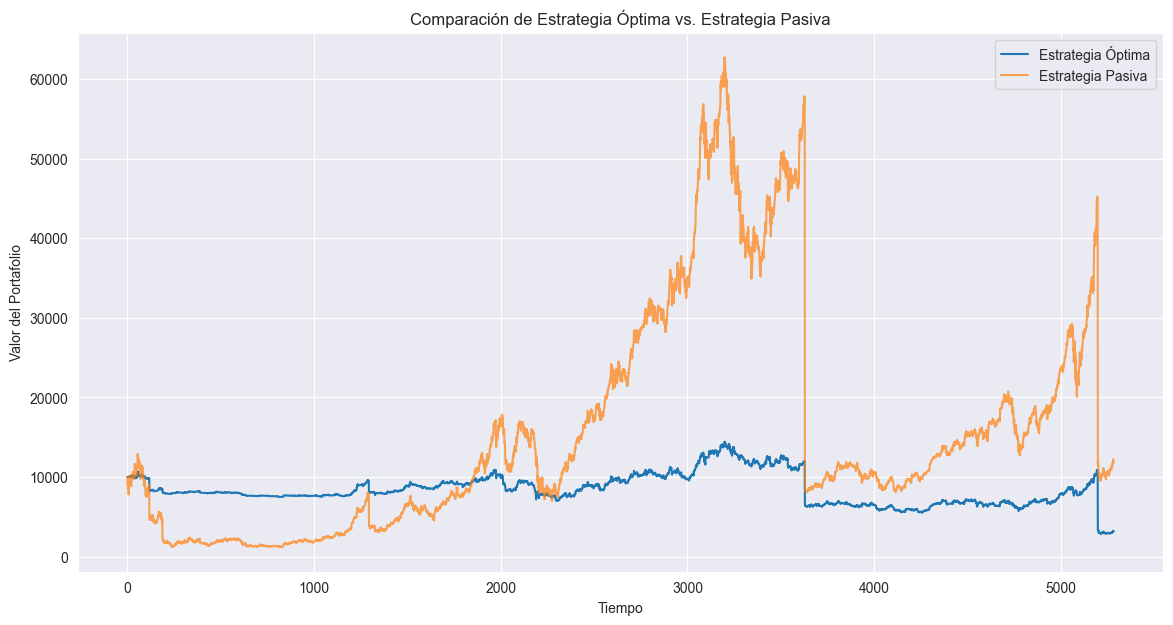

In [9]:
# Visualiza los resultados de la estrategia óptima y compáralos con la estrategia pasiva
plt.figure(figsize=(14, 7))
plt.plot(backtest_results['portfolio_value_over_time'], label='Estrategia Óptima')
plt.plot(data_1d['Close'] / data_1d['Close'].iloc[0] * 10000, label='Estrategia Pasiva', alpha=0.7)
plt.title('Comparación de Estrategia Óptima vs. Estrategia Pasiva')
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend()
plt.show()


In [10]:
# Ejemplo de visualización: gráfico de velas con señales de compra/venta
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_1d['Date'],
                open=data_1d['Open'],
                high=data_1d['High'],
                low=data_1d['Low'],
                close=data_1d['Close'])])


fig.show()


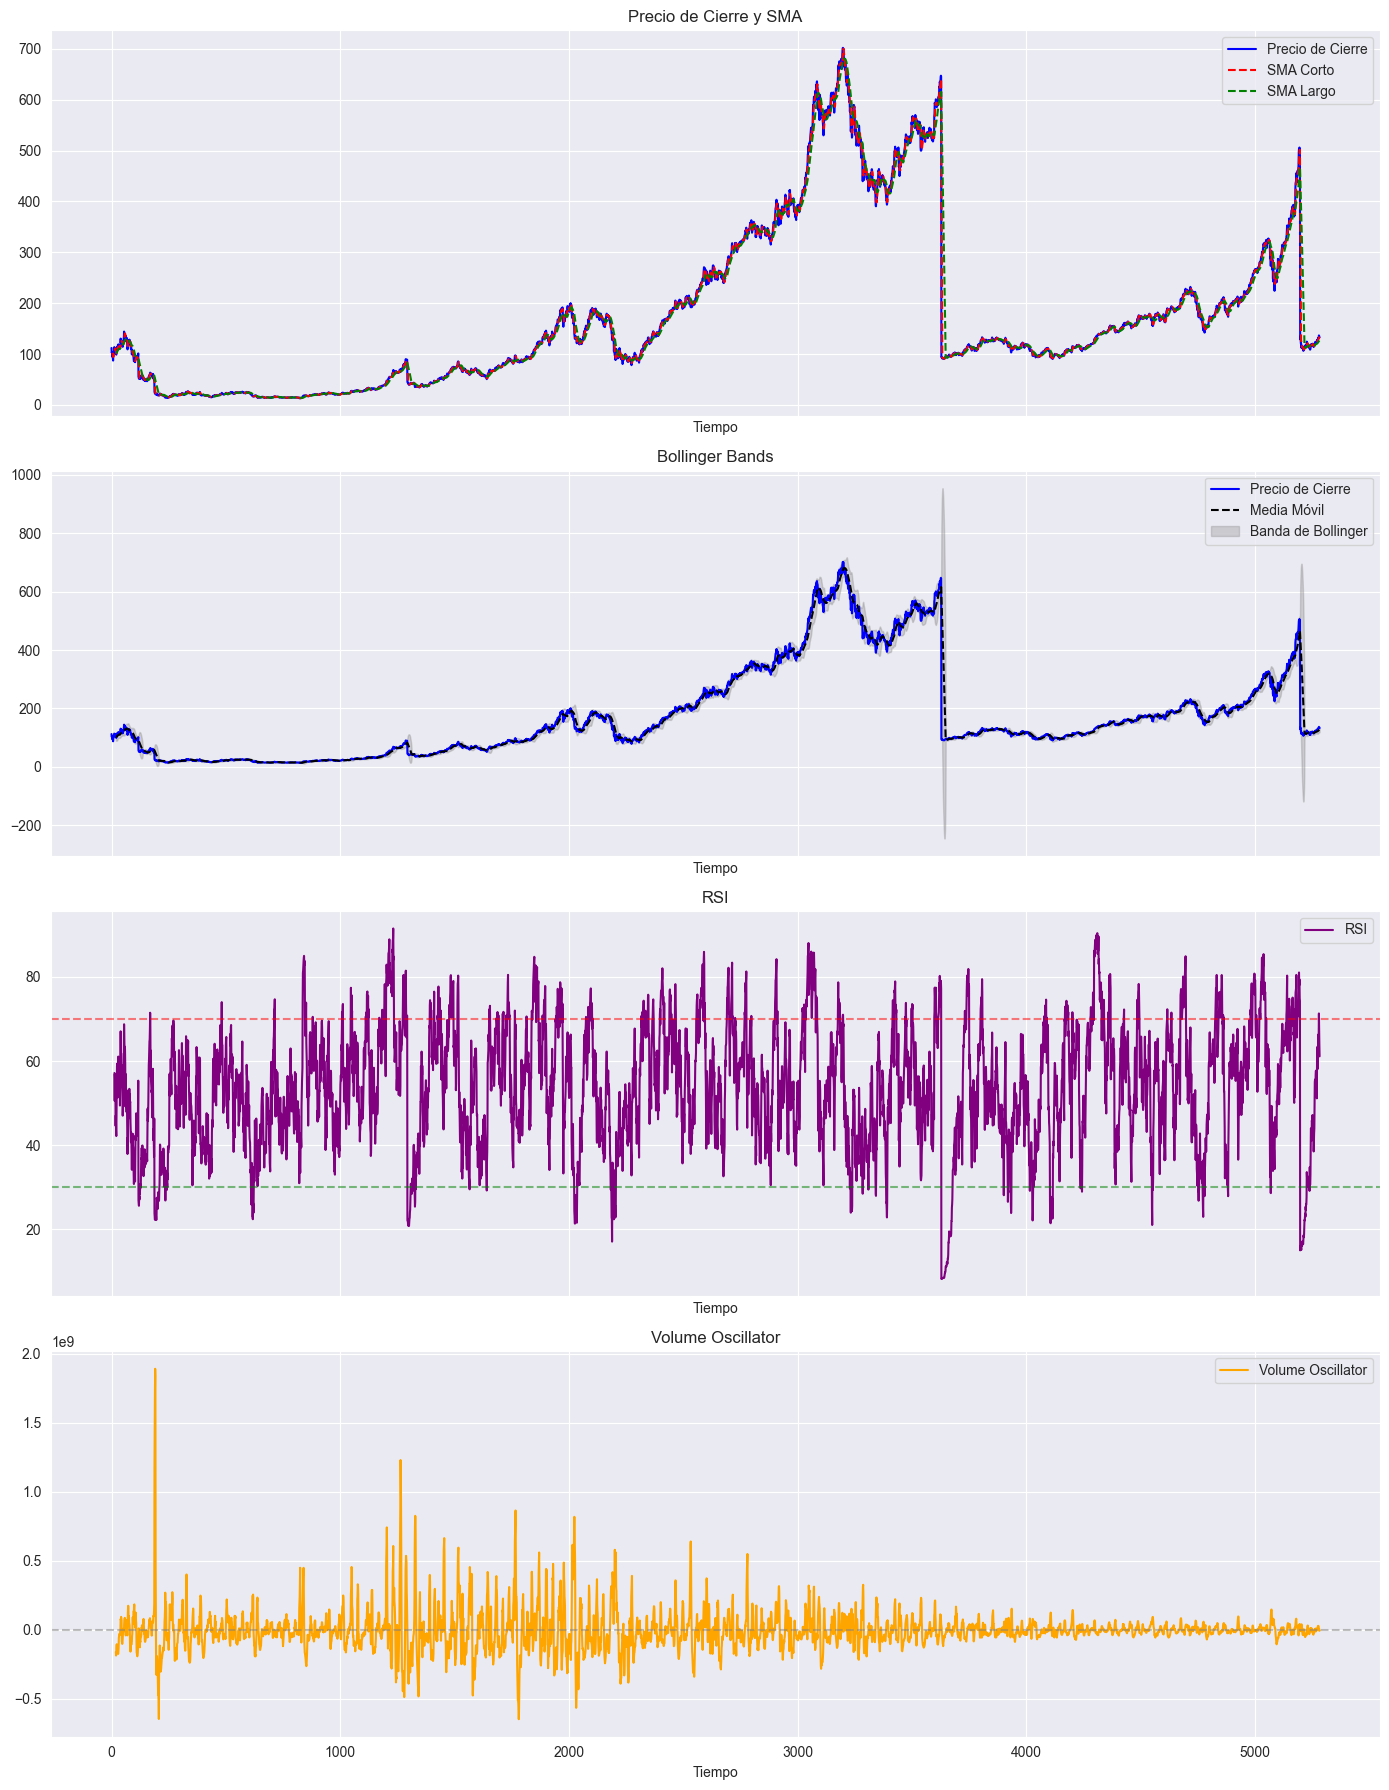

In [11]:
# Cálculos de indicadores
data_1d['RSI'] = calculate_rsi(data_1d, window=14)
data_1d['SMA_short'] = calculate_sma(data_1d['Close'], window=5)
data_1d['SMA_long'] = calculate_sma(data_1d['Close'], window=20)
data_1d['BB_mavg'], data_1d['BB_hband'], data_1d['BB_lband'] = calculate_bollinger(data_1d, 20, 2)
data_1d['Volume_Osc'] = calculate_volume_oscillator(data_1d, 5, 20)

# Configuración de la figura para múltiples subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

# Precio de cierre y SMA
axs[0].plot(data_1d['Close'], label='Precio de Cierre', color='blue')
axs[0].plot(data_1d['SMA_short'], label='SMA Corto', color='red', linestyle='--')
axs[0].plot(data_1d['SMA_long'], label='SMA Largo', color='green', linestyle='--')
axs[0].set_title('Precio de Cierre y SMA')
axs[0].legend()

# Bollinger Bands
axs[1].plot(data_1d['Close'], label='Precio de Cierre', color='blue')
axs[1].plot(data_1d['BB_mavg'], label='Media Móvil', color='black', linestyle='--')
axs[1].fill_between(data_1d.index, data_1d['BB_hband'], data_1d['BB_lband'], color='gray', alpha=0.3, label='Banda de Bollinger')
axs[1].set_title('Bollinger Bands')
axs[1].legend()

# RSI
axs[2].plot(data_1d['RSI'], label='RSI', color='purple')
axs[2].axhline(70, linestyle='--', color='red', alpha=0.5)
axs[2].axhline(30, linestyle='--', color='green', alpha=0.5)
axs[2].set_title('RSI')
axs[2].legend()

# Volume Oscillator
axs[3].plot(data_1d['Volume_Osc'], label='Volume Oscillator', color='orange')
axs[3].axhline(0, linestyle='--', color='gray', alpha=0.5)
axs[3].set_title('Volume Oscillator')
axs[3].legend()

# Configurar el eje X compartido
for ax in axs:
    ax.set_xlabel('Tiempo')

plt.tight_layout()
plt.show()
